# test-6

LogCircular 1:10 GO (FLUX)

23 dic 2024

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None, show_conservative=False):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['std FLUX err'],"r-+", linewidth=1.0, label='Exact Error (std)')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['std FLUX err'],"b-+", linewidth=0.3, label='GlobRef exact error (std) (Reference)')

  if show_conservative:
    plt.loglog(data['DoFs'], data['Cons. FLUX err'],"r:+", linewidth=1.0, label='Exact Error (cons)')
    if reference_file_name is not None:
      plt.loglog(reference_data['DoFs'], reference_data['Cons. FLUX err'],"b:+", linewidth=0.5, label='GlobRef exact error (cons) (Reference)')
      
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated FLUX error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

config-2

mesh A \
Manifolf only on Bdry \
non-iso

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    7584    7742 3.5674313951e+00 2.9288584660e-02 9.0638885160e+02   
1      1    7968    8258 3.1230346132e+00 2.5371036817e-02 8.3980611124e+02   
2      2    8664    9178 2.8707357163e+00 2.3482574651e-02 8.0622807429e+02   
3      3    9672   10594 2.8738271982e+00 2.3579363086e-02 8.0316046538e+02   
4      4   11364   12880 2.8584105512e+00 2.3451034531e-02 8.0014826416e+02   
5      5   14694   17226 2.8818099869e+00 2.3642653515e-02 8.0222706565e+02   
6      6   22260   27282 2.8143328353e+00 2.3102539150e-02 7.9490488298e+02   
7      7   37704   47680 2.2902898315e+00 1.9097127788e-02 7.3716067262e+02   
8      8   70065   89900 1.0917988634e+00 9.8651951876e-03 5.8386384729e+02   
9      9  138114  177528 2.0341690629e-01 5.9194669044e-03 4.3697721340e+02   

      std FLUX err          est err   Cons. FLUX err  
0 4.5994602189e+03 4.3399378288e+03 4.1031247000e+01  
1 2.9158921874e+03 2

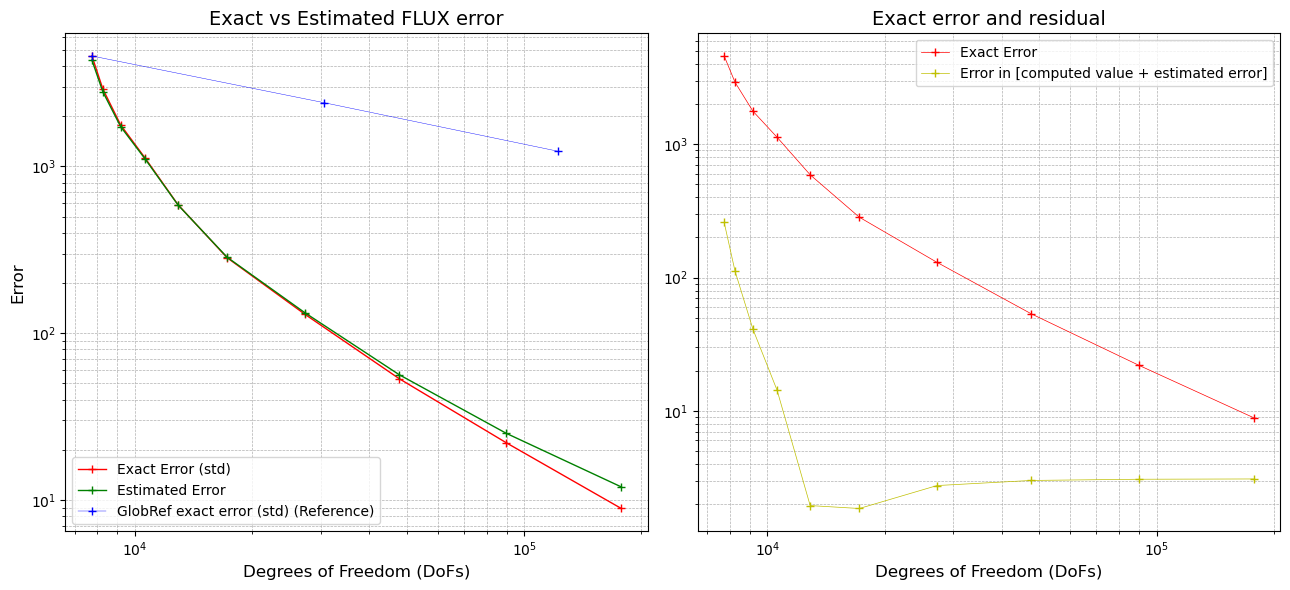

In [22]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv")

config-3

add 1 concentric refinement at radius 1.5x $R_i$

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    9006    9322 1.9502237986e+00 1.6398453989e-02 7.0827563321e+02   
1      1    8838    9417 2.8956927556e+00 2.3736177745e-02 8.0719428696e+02   
2      2   10227   11313 2.8633181865e+00 2.3401569746e-02 8.0033187547e+02   
3      3   13551   15520 2.6194437043e+00 2.1674532951e-02 7.7415344063e+02   
4      4   17280   20415 2.6260666405e+00 2.1858388622e-02 7.7594665571e+02   
5      5   22461   27523 2.6670110032e+00 2.2090152219e-02 7.8028670140e+02   
6      6   37914   48020 2.2953239436e+00 1.9133386295e-02 7.3783509251e+02   
7      7   70557   90734 1.1010181254e+00 9.8870017045e-03 5.8466909677e+02   
8      8  140076  180394 2.0284886677e-01 5.9291828613e-03 4.3765121621e+02   

      std FLUX err          est err   Cons. FLUX err  
0 2.3937468761e+03 2.3253913695e+03 2.7379741000e+01  
1 1.4384818418e+03 1.4126999916e+03 8.4781310000e+00  
2 9.4120705746e+02 9.3124012106e+02 6.668871

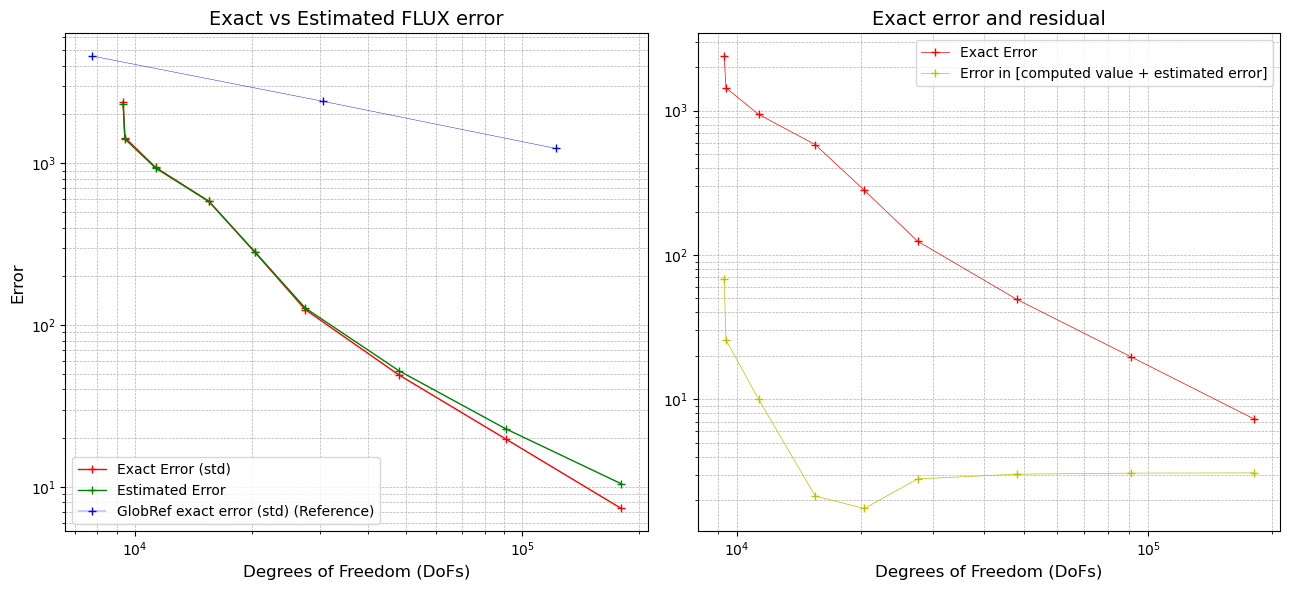

In [23]:
make_plots("./results/config-3/convergence_results.csv","./results/config-1/convergence_results.csv")

config-5

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    7584    7742 3.5716305330e+00 3.3972802493e-02 8.2316087113e+02   
1      1    7968    8258 2.9471630651e+00 2.8900964142e-02 7.5311844626e+02   
2      2    8604    9111 2.6545574363e+00 2.6878676409e-02 7.2212783911e+02   
3      3    9684   10538 2.5677498601e+00 2.6322421389e-02 7.1263131477e+02   
4      4   11076   12398 2.5572648257e+00 2.6274563970e-02 7.1152412891e+02   
5      5   14136   16571 2.5717535191e+00 2.6410223047e-02 7.1331445591e+02   
6      6   22938   27719 2.3103495792e+00 2.4395609811e-02 6.8271727497e+02   
7      7   33180   41474 2.0112224296e+00 2.1905983455e-02 6.4349652338e+02   
8      8   54663   69985 9.9217733851e-01 1.2913545833e-02 4.9165655536e+02   
9      9  109425  136065 4.4903185700e-01 8.1369994774e-03 3.8778197463e+02   

      std FLUX err          est err   Cons. FLUX err  
0 4.6060464326e+03 4.3427501779e+03 3.3833901000e+01  
1 2.9221800467e+03 2

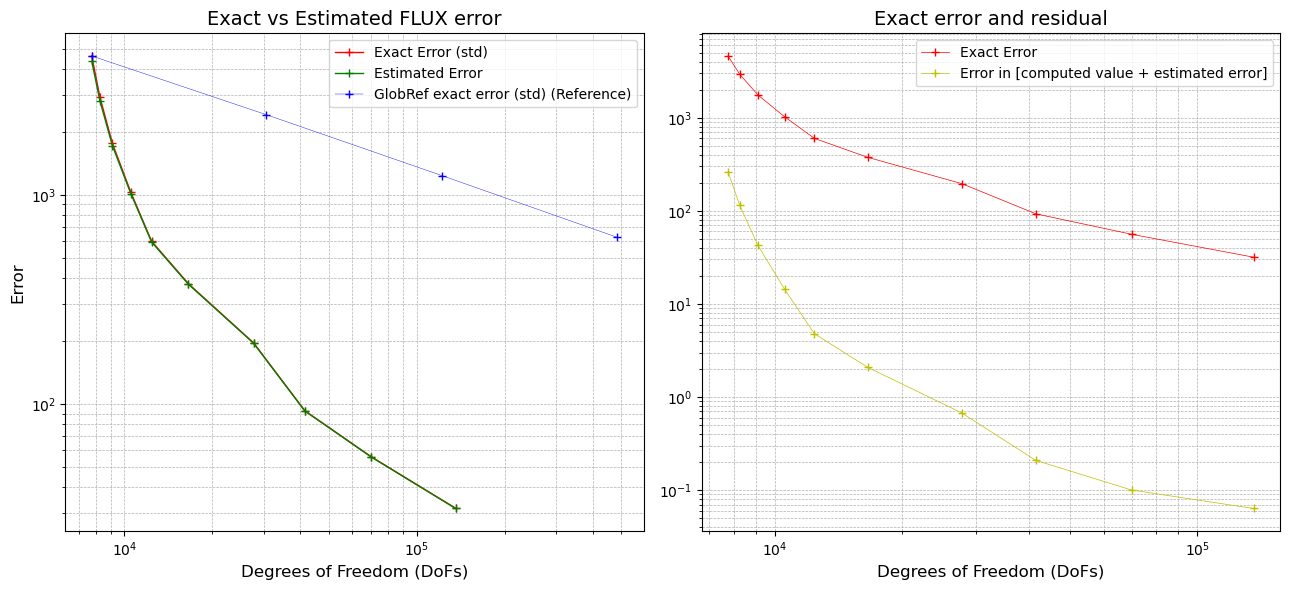

In [24]:
make_plots("./results/config-5/convergence_results.csv","./results/config-4/convergence_results.csv")

config-6 \
add concentric refinement

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    9006    9322 1.8089574965e+00 1.9897600926e-02 6.1647719263e+02   
1      1    8892    9489 2.6090830362e+00 2.6628379646e-02 7.1752009025e+02   
2      2   10353   11424 2.5635831336e+00 2.6196058053e-02 7.1060031855e+02   
3      3   12768   14748 2.5513892044e+00 2.6270508336e-02 7.1144886665e+02   
4      4   19032   22442 2.2632304918e+00 2.4211660243e-02 6.7950721327e+02   
5      5   22254   27310 2.5679052257e+00 2.6381487884e-02 7.1290526725e+02   
6      6   37896   47964 2.0248044502e+00 2.1998264934e-02 6.4538530593e+02   
7      7   69042   88822 9.8869809704e-01 1.2896229692e-02 4.9155011838e+02   
8      8  135564  174054 4.2490920670e-01 7.8494820127e-03 3.8251078337e+02   
9      9  253302  325590 1.8411109752e-01 4.7758942419e-03 2.9494559090e+02   

      std FLUX err          est err   Cons. FLUX err  
0 2.4029616153e+03 2.3313092470e+03 1.8956365000e+01  
1 1.3814033585e+03 1

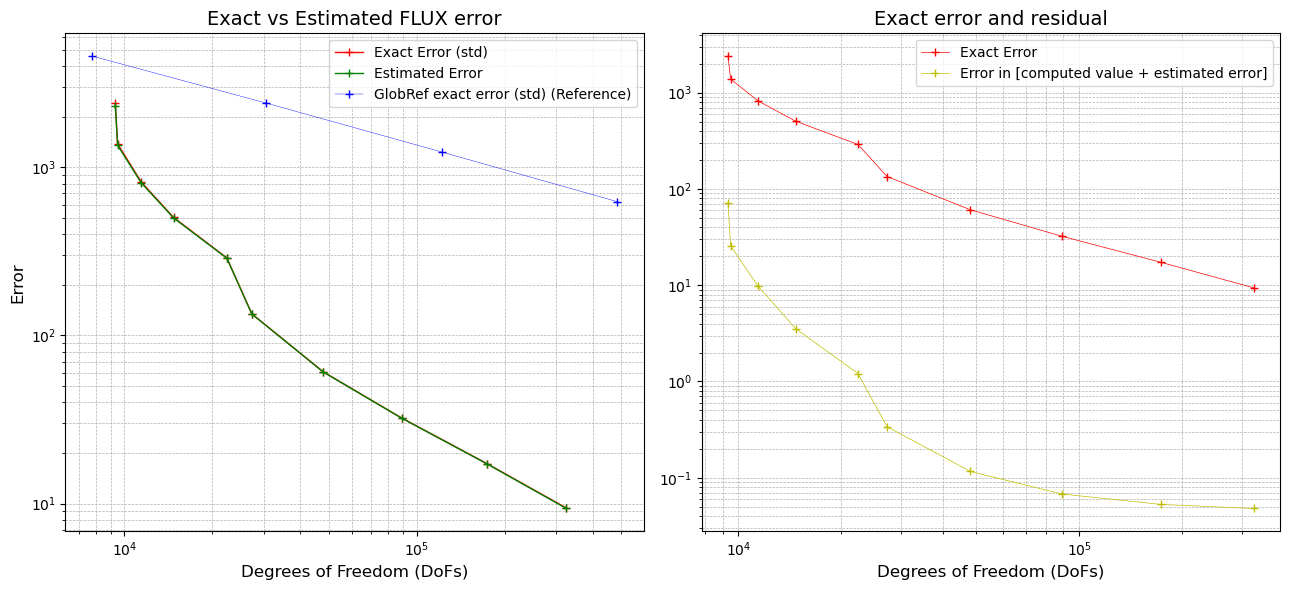

In [25]:
make_plots("./results/config-6/convergence_results.csv","./results/config-4/convergence_results.csv")

Comaparison: with and without cocnentric refinement

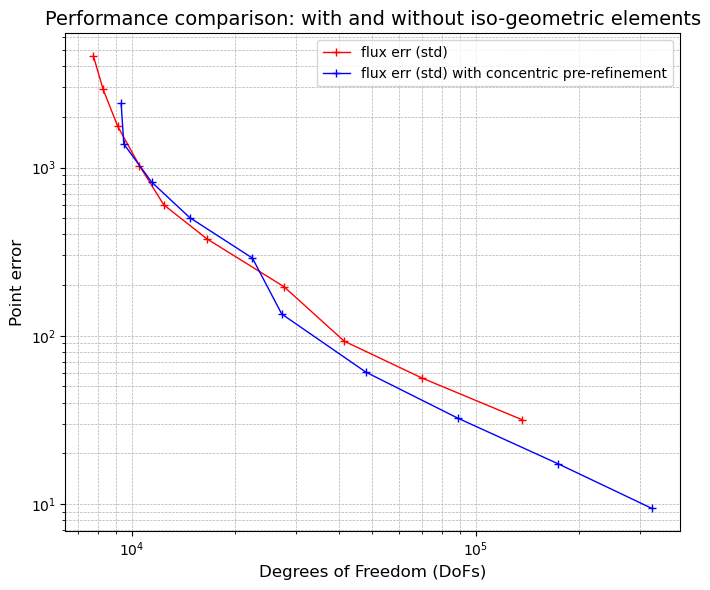

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

file_name = "./results/config-5/convergence_results.csv"
concentric_file_name = "./results/config-6/convergence_results.csv"

data = pd.read_csv(file_name)

concentric_data = pd.read_csv(concentric_file_name)


plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['std FLUX err'],"r-+", linewidth=1.0, label='flux err (std)')

plt.loglog(concentric_data['DoFs'], concentric_data['std FLUX err'],"b-+", linewidth=1.0, label='flux err (std) with concentric pre-refinement')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Point error', fontsize=12)
plt.title('Performance comparison: with and without iso-geometric elements', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Not a huge difference is observed

config-8

mesh-B, iso 

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0     532     570 5.3177609259e+00 1.4272476078e-01 1.5887611408e+03   
1       1     628     700 4.3250495860e+00 1.3736606500e-01 1.5326203647e+03   
2       2     793     920 3.9132216391e+00 1.3555204618e-01 1.5119026377e+03   
3       3    1135    1377 3.8131954311e+00 1.3512433297e-01 1.5065833239e+03   
4       4    1762    2223 3.7985683231e+00 1.3506260855e-01 1.5057969789e+03   
5       5    3166    4081 3.6637541235e+00 1.3448597935e-01 1.4994069766e+03   
6       6    5803    7172 2.1941750810e+00 3.6632646700e-02 9.1288197128e+02   
7       7    9652   12302 2.0345544200e+00 3.5706450259e-02 9.0067583267e+02   
8       8   18715   23725 5.9855269192e-01 2.9340046086e-02 7.5346672272e+02   
9       9   34816   44140 9.1913415241e-01 9.3515054006e-03 5.0812763341e+02   
10     10   83437  103720 5.1448941365e-01 7.7163501856e-03 4.3605385194e+02   
11     11  127312  160305 3.9474246845e-

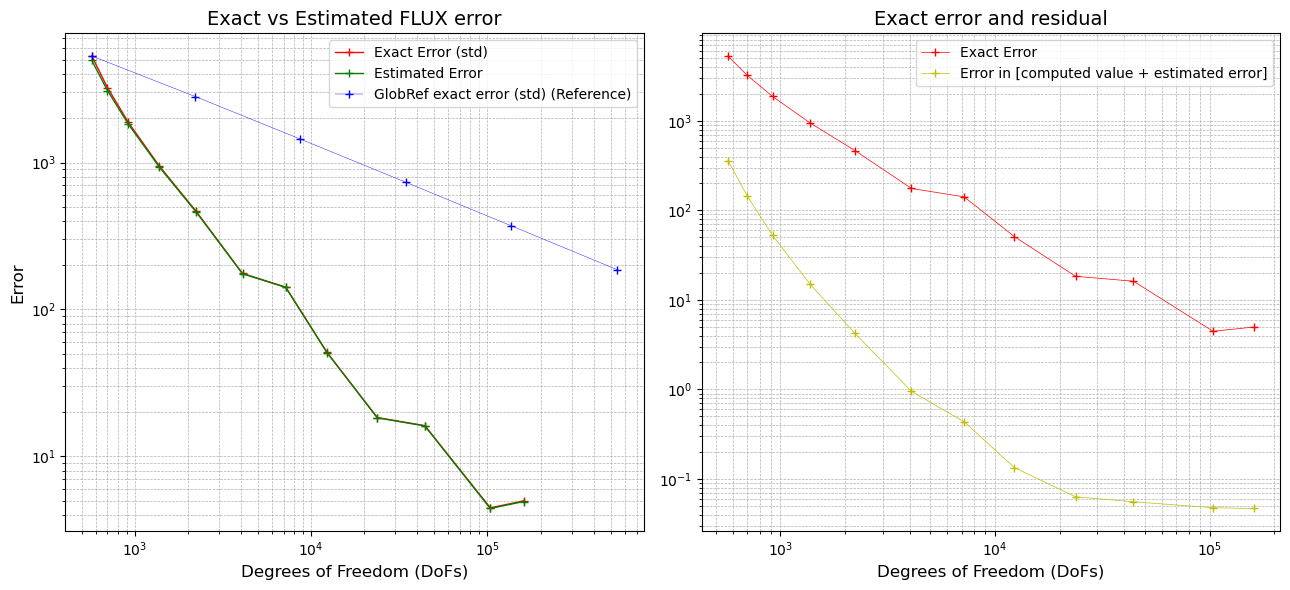

In [27]:
make_plots("./results/config-8/convergence_results.csv","./results/config-7/convergence_results.csv")

comaprison mesh A and B

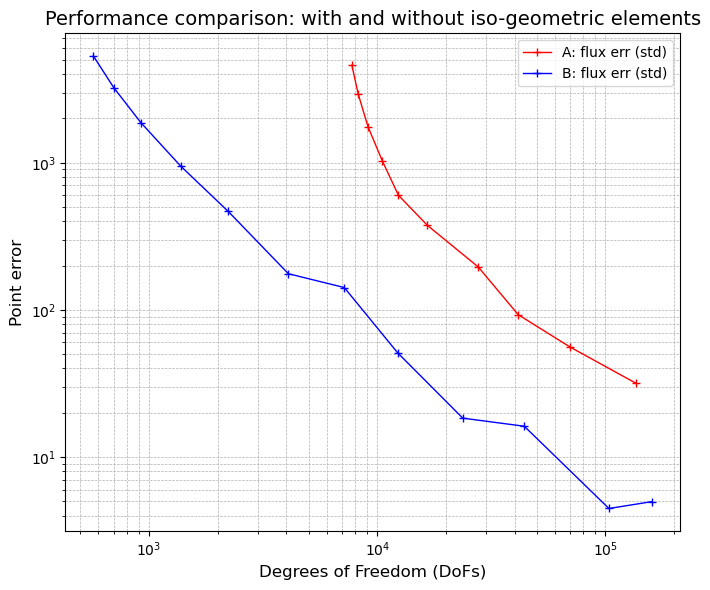

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

A_file_name = "./results/config-5/convergence_results.csv"
B_file_name = "./results/config-8/convergence_results.csv"

A_data = pd.read_csv(file_name)

B_data = pd.read_csv(B_file_name)


plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1) 
plt.loglog(A_data['DoFs'], A_data['std FLUX err'],"r-+", linewidth=1.0, label='A: flux err (std)')

plt.loglog(B_data['DoFs'], B_data['std FLUX err'],"b-+", linewidth=1.0, label='B: flux err (std)')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Point error', fontsize=12)
plt.title('Performance comparison: with and without iso-geometric elements', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()